1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

A matrix multiplication between A= (n,k) and B= (k,m) results in a matrix C= (n,m).

For an element in C, Cij=Ai1xB1j + Ai2xB2j +...+ AikxBkj

Thus, number of multiplications needed are nxmxk
and number of additions needed are nxmx(k-1)

2. Write Python code to multiply the above two matrices. 
Solve using list of lists and then use numpy.
Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import time

#using list of lists

start_time_list = time.time()

A=[[1,2],[3,4],[5,6]]
B=[[1,2,3,4],[5,6,7,8]]

def matrixmultiply(A, B):
    n=len(A)
    k=len(B)
    m=len(B[0])

    mat=[[0 for i in range(m)] for j in range(n)]

    for p in range(n):
        for q in range(m):
            for r in range(k):
                mat[p][q]=mat[p][q]+A[p][r]*B[r][q]

    return mat

mat=matrixmultiply(A, B)

end_time_list = time.time()

print(mat)

list_time = end_time_list - start_time_list

print('Time taken using list of lists:',list_time)


#using numpy

start_time_numpy = time.time()

import numpy as np

matrix=np.dot(A, B)
print(matrix)

end_time_numpy = time.time()

numpy_time = end_time_numpy - start_time_numpy
print('Time taken using NumPy:',numpy_time)




[[11, 14, 17, 20], [23, 30, 37, 44], [35, 46, 57, 68]]
Time taken using list of lists: 0.0
[[11 14 17 20]
 [23 30 37 44]
 [35 46 57 68]]
Time taken using NumPy: 0.1737358570098877


Numpy's optimized algorithms and use of vectorized operations enable faster matrix computations, unlike Python lists, which lack these specialized optimizations, resulting in slower calculations.

3. Finding the highest element in a list requires one pass of the array. 
Finding the second highest element requires 2 passes of the the array.
Using this method, what is the time complexity of finding the median of the array? 
Can you suggest a better method? 
Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [61]:
array = [5,2,7,3,9,8,6,1,4]

import time

def median_num(arr):
    n = len(arr)
    for i in range(n // 2):
        maximum = max(arr)
        arr.remove(maximum)

    if n%2 ==1:
        return max(arr)
    else:
        return (max(arr)+maximum)/2

def sorting(arr):
    sorted_arr=sorted(arr)
    n =len(sorted_arr)

    if n % 2 == 1:
        return sorted_arr[n//2]
    
    else:
        return (sorted_arr[n//2-1]+sorted_arr[n//2])/2

start_time = time.time()
median_n = median_num(array.copy())
end_time = time.time()

print('Median:',median_n)
print('Time:',end_time-start_time)

start_time = time.time()
median_sorting= sorting(array.copy())
end_time =time.time()

print('Median:',median_sorting)
print('Time:',end_time-start_time)

start_time = time.time()
median_np = np.median(array.copy())
end_time = time.time()

print('Median:',median_np)
print('Time:',end_time-start_time)


Median: 5
Time: 0.0
Median: 5
Time: 0.0
Median: 5.0
Time: 0.0010805130004882812


The time complexity using this method is O(n^2).

4. What is the gradient of the following function with respect to x and y?
$$x^2y+y^3sinx$$

Partial derivative with respect to x:
$$2xy+y^3cosx$$

Partial derivative with respect to y:
$$x^2+3y^2sinx$$

5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [2]:
import jax
import jax.numpy as jnp

def f(x, y):
    return (x**2)*y+(y**3)*jnp.sin(x)

gradient=jax.grad(f, argnums=(0, 1))

x=2.0
y=3.0

analytical= (2*x*y+y**3*jnp.cos(x),x**2+3*y**2*jnp.sin(x))

jaxgradient=gradient(x,y)

print(analytical)
print(jaxgradient)


ModuleNotFoundError: No module named 'jaxlib'

6. Use sympy to confirm that you obtain the same gradient analytically.

In [3]:
import sympy as sp

x,y=sp.symbols('x y')

f=(x**2)*y+(y**3)*sp.sin(x)

df_dx=sp.diff(f,x)
df_dy=sp.diff(f,y)

print(df_dx)
print(df_dy)



2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


7. Create a Python nested dictionary to represent hierarchical information. 
We want to store record of students and their marks. 
Something like: 2022 
                    Branch 1 
                        Roll Number: 1
                        Name: N
                        Marks
                            Maths: 100
                            English: 70
                    Branch 2 
                2023 
                    Branch 1 
                    Branch 2 
                2024 
                    Branch 1 
                    Branch 2 
                2025 
                    Branch 1 
                    Branch 2

In [16]:
student = {2022:{'Branch 1':{'Roll Number': 1, 'Name':'N', 'Marks':{'Maths':100, 'English':70}},'Branch 2':{}},
           2023:{'Branch 1':{},'Branch 2':{}},
           2024:{'Branch 1':{},'Branch 2':{}},
           2025:{'Branch 1':{},'Branch 2':{}}}

print(student)

{2022: {'Branch 1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


8. Store the same information using Python classes. 
We have an overall database which is a list of year objects. 
Each year contains a list of branches. 
Each branch contains a list of students. 
Each student has some properties like name, roll number and has marks in some subjects.

In [30]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, branch_name):
        self.branch = branch_name  # Fixing the initialization here
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

def print_records(data):
    for year in data:
        print('\t',year.year)
        for branch in year.branches:
            print('\t\t',branch.branch)  # Accessing the branch attribute
            for student in branch.students:
                print('\t\t\tRoll Number:', student.roll_number)
                print('\t\t\tName:', student.name)
                print('\t\t\tMarks:', student.marks)

student1 = Student(1, 'N', {'Maths': 100, 'English': 70})

branch1_2022 =Branch('Branch1')
branch1_2022.add_student(student1)

branch2_2022 =Branch('Branch2')

year_2022 =Year(2022)
year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)

branch1_2023 =Branch('Branch1')
branch2_2023 =Branch('Branch2')

year_2023 =Year(2023)
year_2023.add_branch(branch1_2023)
year_2023.add_branch(branch2_2023)

branch1_2024 =Branch('Branch1')
branch2_2024 =Branch('Branch2')

year_2024 =Year(2024)
year_2024.add_branch(branch1_2024)
year_2024.add_branch(branch2_2024)

branch1_2025 =Branch('Branch1')
branch2_2025=Branch('Branch2')

year_2025=Year(2025)
year_2025.add_branch(branch1_2025)
year_2025.add_branch(branch2_2025)

data=[year_2022,year_2023,year_2024,year_2025]

print_records(data)


	 2022
		 Branch1
			Roll Number: 1
			Name: N
			Marks: {'Maths': 100, 'English': 70}
		 Branch2
	 2023
		 Branch1
		 Branch2
	 2024
		 Branch1
		 Branch2
	 2025
		 Branch1
		 Branch2


9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

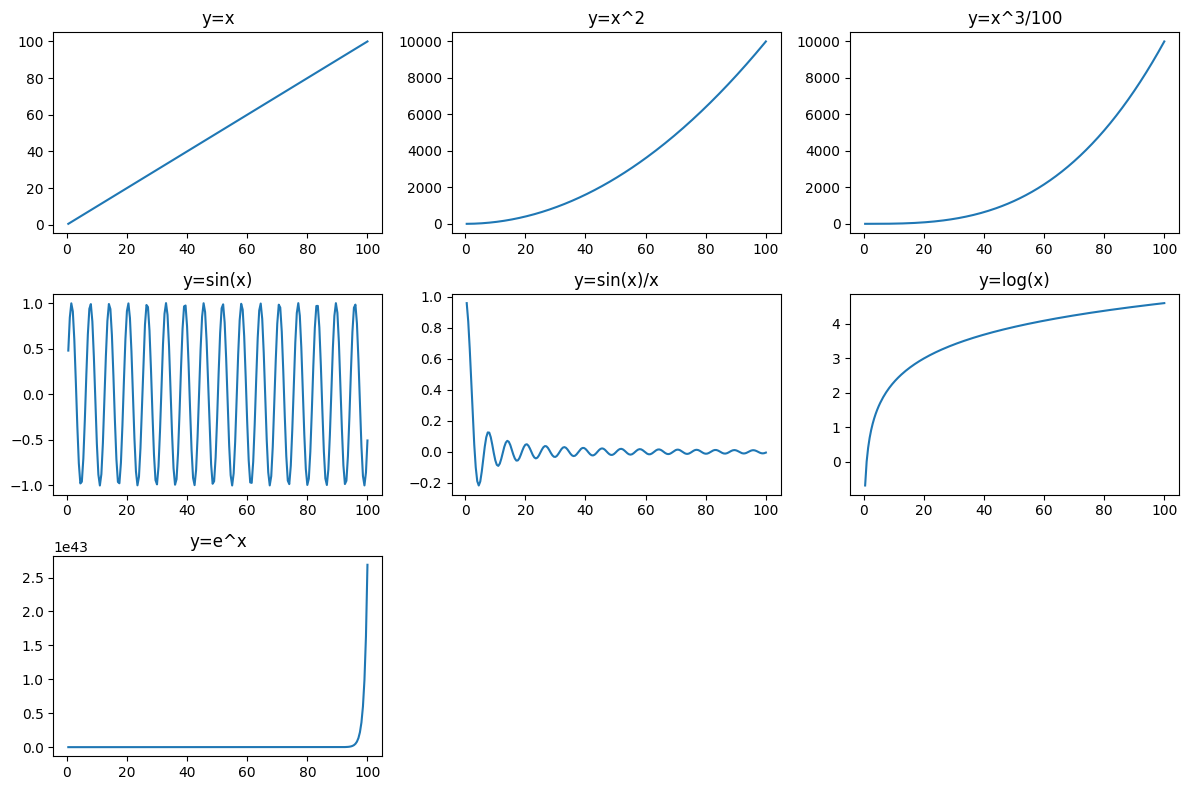

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5,100.5,0.5)

y1 = x
y2 = x**2
y3 = x**3/100
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(12, 8))

plt.subplot(3,3,1)
plt.plot(x,y1)
plt.title('y=x')

plt.subplot(3,3,2)
plt.plot(x,y2)
plt.title('y=x^2')

plt.subplot(3,3,3)
plt.plot(x,y3)
plt.title('y=x^3/100')

plt.subplot(3,3,4)
plt.plot(x,y4)
plt.title('y=sin(x)')

plt.subplot(3,3,5)
plt.plot(x,y5)
plt.title('y=sin(x)/x')

plt.subplot(3,3,6)
plt.plot(x,y6)
plt.title('y=log(x)')

plt.subplot(3,3,7)
plt.plot(x,y7)
plt.title('y=e^x')

plt.tight_layout()
plt.show()


10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. 
Using Pandas create a dataframe out of this matrix. 
Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. 
Find the column with the highest standard deviation. 
Find the row with the lowest mean.

In [7]:
import numpy as np
import pandas as pd

np.random.seed(42)
data_matrix =np.random.uniform(1,2,size=(20,5))

df =pd.DataFrame(data_matrix, columns=['a','b','c','d','e'])

max_std_column =df.std().idxmax()
print('Column with highest standard deviation:',max_std_column)

min_mean_row = df.mean(axis=1).idxmin()
print('Row with the lowest mean:',min_mean_row)

Column with highest standard deviation: c
Row with the lowest mean: 11


11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. 
Create another column called “g”. 
The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. 
Find the number of rows in the dataframe where the value in the column “g” is “LT8”. 
Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [8]:
df['f'] =df[['a','b','c','d','e']].sum(axis=1)

df['g'] =np.where(df['f']< 8,'LT8','GT8')

num_LT8_rows =df[df['g']=='LT8'].shape[0]
print('Number of rows where g is LT8:',num_LT8_rows)

std_LT8 =df[df['g']=='LT8']['f'].std()
std_GT8 =df[df['g']=='GT8']['f'].std()

print('Standard deviation of f where g is LT8:',std_LT8)
print('Standard deviation of f where g is GT8:',std_GT8)


Number of rows where g is LT8: 18
Standard deviation of f where g is LT8: 0.4025886500663061
Standard deviation of f where g is GT8: 0.7956146881961926


12. Write a small piece of code to explain broadcasting in numpy.

In [9]:
arr = np.array([1, 2, 3])

x = 2

y = arr+x

print('Array:',arr)
print('Scalar:',x)
print('Result:',y)


Array: [1 2 3]
Scalar: 2
Result: [3 4 5]


13. Write a function to compute the argmin of a numpy array. 
The function should take a numpy array as input and return the index of the minimum element. 
You can use the np.argmin function to verify your solution.

In [10]:
def argmin_new(arr):
    min_value = arr[0] 
    min_index = 0  
    
    for i, val in enumerate(arr):
        if val < min_value:
            min_value = val
            min_index = i
    
    return min_index

array = np.array([5,3,8,2,9,1])
argmin_fn = argmin_new(array)
argmin_numpy = np.argmin(array)

print('Index:',argmin_fn)
print('Index:',argmin_numpy)


Index: 5
Index: 5
